# Pruebas de hipótesis


## Proporción poblacional

En el desarrollo de pruebas de hipótesis para la proporción poblacional, tenemos los tres siguientes casos:

| | Cola superior | Cola inferior | Dos colas |
|----------| ---------- | ---------- | ---------- |
|Hipótesis nula |$p \leq p_0$ | $p \geq p_0$ | $p = p_0$ |
|Hipótesis alternativa |$p > p_0$ | $p < p_0$ | $p \neq p_0$ |
|Estadístico de prueba |$z=\cfrac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$ | $z=\cfrac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$ | $z=\cfrac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$ |
|Rechazar $H_0$ si: |Valor-p $\leq \alpha $ | Valor-p $\leq \alpha $ | 2*Valor-p $\leq \alpha $|
|Rechazar $H_0$ si: |$z \geq z_{\alpha} $ | $z \leq z_{\alpha} $ | $z \leq -z_{\alpha/2} $, o , $z \geq z_{\alpha/2} $|

donde $p_0$ representa la proporción poblacional hipotética.

Estas pruebas se basan en la diferencia entre la proporción muestral $\hat{p}$ y la proporción poblacional hipotética $p_0$.



## Ejemplo

Supongamos que una empresa fabricante de snacks lanza un nuevo sabor de papas fritas y quiere saber si ha sido bien recibido por sus consumidores. La empresa ha establecido un objetivo donde esperan que al menos el 60% de los consumidores prefiera el nuevo sabor sobre los sabores existentes. Para verificar esto, realizan una encuesta de mercado con una muestra aleatoria de consumidores.

### Datos del Ejemplo

Número de consumidores encuestados: $100$

Número de consumidores que prefieren el nuevo sabor: $70$

Proporción de preferencia muestral: $\hat{p} = \cfrac{70}{100} = 0.70 $

Proporción de preferencia esperado: $p_0 = \cfrac{60}{100} = 0.60 $

Nivel de significancia $\alpha = 0.05$

### Planteamiento de las hipótesis

$$H_0 : p_0 \leq 60$$

$$H_1 : p_0 > 60$$

### Estadístico de prueba

$$z=\cfrac{\bar{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$$

$$z=\cfrac{0.70-0.60}{\sqrt{\frac{0.6(1-0.6)}{100}}}$$


In [1]:
import numpy as np
from scipy.stats import norm

In [2]:
(0.70-0.60)/np.sqrt(0.6*(1-0.6)/100)

2.0412414523193148

### Cálculo del valor-p

In [3]:
p_valor=norm.sf(2.04124, 0, 1) # Es de cola superior
p_valor

0.020613488811325045

In [4]:
p_valor<=0.05

True

#### Rechazamos la hipótesis nula.

 Esto indicaría que hay evidencia estadística suficiente para afirmar que más del 60% de los consumidores prefieren el nuevo sabor, superando el objetivo establecido por la empresa.

### Método del valor crítico

In [5]:
valor_critico= norm.ppf(0.95, 0, 1) # 5% de error en la cola superior
valor_critico

1.6448536269514722

Esto indica que cualquier valor del estadístico de prueba mayor a 1.64 está en la zona de rechazo, como $z = 2.04$, rechazamos la hipótesis nula.

### Un código para esta prueba

In [13]:
import numpy as np
from scipy.stats import norm

# Datos del ejemplo
n = 100  # tamaño de la muestra
num_favor = 70  # número que prefieren el nuevo sabor
p_hat = num_favor / n  # proporción muestral
p_0 = 0.60  # proporción bajo la hipótesis nula
alpha = 0.05  # nivel de significancia

# Calcular el estadístico de prueba Z
std_error = np.sqrt(p_0 * (1 - p_0) / n)
z_stat = (p_hat - p_0) / std_error

# Determinar el valor crítico y calcular el p-valor
z_critical = norm.ppf(1 - alpha)  # Valor Z crítico para prueba de cola superior
p_value = 1 - norm.cdf(z_stat)  # p-valor

print(f"Estadístico de prueba Z: {z_stat:.2f}")
print(f"Valor crítico Z: {z_critical:.2f}")
print(f"P-valor: {p_value:.4f}")

# Decisión basada en el p-valor
if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")




Estadístico de prueba Z: 2.04
Valor crítico Z: 1.64
P-valor: 0.0206
Rechazamos la hipótesis nula.


# Relacionemos este dato con el intervalo de confianza

In [9]:
# Datos
p_hat = 0.70  # Proporción muestral
n = 100            # Tamaño de la muestra
confidence_level = 0.95
z_star = norm.ppf((1 + confidence_level) / 2)  # Valor crítico z para 95% de confianza

# Cálculo del margen de error
margin_error = z_star * np.sqrt(p_hat * (1 - p_hat) / n)

# Cálculo del intervalo de confianza
ci_lower = p_hat - margin_error
ci_upper = p_hat + margin_error

print(f"Intervalo de confianza al 95%: ({ci_lower:.3f}, {ci_upper:.3f})")

Intervalo de confianza al 95%: (0.610, 0.790)


Con un 95% de confianza la proporción de personas que preferirá la marca será entre el 61% y el 79%.

## Intervalos de confianza y pruebas de hipótesis con dos poblaciones

Se pueden realizar pruebas de hipótesis para comparar dos poblaciones. En este caso, se pueden comparar las medias o las proporciones de dos poblaciones. Iniciaremos con el caso de  muestras independientes, es decir,  Se toman dos muestras aleatorias simples o se una emplea un método distinto.


Por ejemplo, supongamos que una empresa quiere comparar la satisfacción de sus clientes en dos tiendas diferentes. Para esto, se realiza una encuesta de satisfacción en ambas tiendas y se compara la proporción de clientes satisfechos en cada una.

O se puede obtener una estimación por intervalo para la diferencia entre el salario inicial medio de la población de hombres y el salario inicial medio de la población de mujeres.

## Notaciones

* $\mu_1$ y $\mu_2$ son las medias de las poblaciones 1 y 2, respectivamente.

* $\sigma_1$ y $\sigma_2$ son las desviaciones estándar de las poblaciones 1 y 2, respectivamente.

* $n_1$ y $n_2$ son los tamaños de las muestras de las poblaciones 1 y 2, respectivamente.

* $\bar{x_1}$ y $\bar{x_2}$ son las medias muestrales de las poblaciones 1 y 2, respectivamente.

* $\delta_0$ es la diferencia entre las medias poblacionales que se quiere probar.

* $\bar{x_1}-\bar{x_2}$ es llamado el estimador puntual de la diferencia entre las medias poblacionales.

* $\mu_1-\mu_2$ es la diferencia entre las medias poblacionales.

* Error estándar de la diferencia entre las medias poblacionales: $$ \sigma_{\bar{x_1}-\bar{x_2}} =\sqrt{\cfrac{\sigma_1^2}{n_1}+\cfrac{\sigma_2^2}{n_2}}$$

* valor crítico: $$z_{\alpha/2}$$ es el valor crítico de la distribución normal estándar para un nivel de significancia $\alpha$.

* Margen de error: $$z_{\alpha/2}\cdot\sigma_{\bar{x_1}-\bar{x_2}}$$

* Intervalo de confianza para la diferencia entre las medias poblacionales: $$ (\bar{x_1}-\bar{x_2}) \pm z_{\alpha/2}\sigma_{\bar{x_1}-\bar{x_2}}$$




### Ejemplo

Greystone Department Stores, Inc. tiene dos tiendas en Buffalo, Nueva York, una en el centro de la ciudad y otra en un centro comercial. El gerente regional ha observado que los productos que se venden bien en una tienda no se venden bien en la otra. El gerente cree que esto se debe a diferencias demográficas entre los clientes de las dos tiendas. Debe haber diferencias de edad, educación, ingreso, etc., entre los clientes de una y otra tienda. Suponga que el gerente pide que se investigue la diferencia entre las medias de las edades de los clientes de las dos tiendas.

Población 1: Clientes que compran en la tienda del centro de la ciudad.
Población 2: Clientes que compran en la tienda del centro comercial.

De acuerdo con datos de anteriores estudios demográficos sobre los clientes, se sabe que:

* $\sigma_1 = 9$ años

* $\sigma_2 = 10$ años

* $n_1 = 36$      

* $n_2 = 49$

* $\bar{x_1} = 40$ años

* $\bar{x_2} = 35$ años

De esto podemos deducir que:








In [14]:
x1_x2 = 40-35 # Estimador puntual de la diferencia de medias
x1_x2

5

Se estima que, en promedio, los clientes de la tienda en el centro de la ciudad son cinco años mayores que los clientes de la tienda del centro comercial.

Con una confianza del 95%, tenemos $\alpha = 0.05$ y por lo tanto:


In [15]:
import numpy as np
from scipy.stats import norm
valor_critico = norm.ppf(0.975, 0, 1) # 2.5% de error en la cola superior
valor_critico

1.959963984540054

In [16]:
error_estandar = np.sqrt(9**2/36 + 10**2/49)
error_estandar

2.071428571428571

In [17]:
margin_error = valor_critico * error_estandar
margin_error

4.059925396547254

Intervalo de confianza para la diferencia de las edades es:


In [18]:
ci_lower = x1_x2 - margin_error
ci_upper = x1_x2 + margin_error

print(f"Intervalo de confianza al 95%: ({ci_lower:.2f}, {ci_upper:.2f})")

Intervalo de confianza al 95%: (0.94, 9.06)


Por tanto, con una confianza del 95% la diferencia entre las edades de los clientes de las dos tiendas está entre 0.94 y 9.06 años.

### Pruebas de hipótesis

La siguiente tabla resume los casos más comunes para pruebas de hipótesis con dos poblaciones:


| Estadístico|         Condiciones| Estadístico de prueba  | $ H_0 $   |$ H_1 $   | Región de rechazo |
|-------------------|-------------------|------------------------------|-----------------------------------|------------------------------|-----------------------------------|
| Media|$\sigma_1$ conocido, $\sigma_2$ conocido,| $z=\cfrac{(\bar{x_1}-\bar{x_2})-\delta_0}{\sqrt{\sigma_1^2/n_1+\sigma_2^2/n_2}}$  | $ \mu_1-\mu_2 = \delta_0 $   |$ \mu_1-\mu_2 \neq \mu_0 $    | $z < -z_{\alpha/2}$, o, $z > z_{\alpha/2}$ |
| Media|$\sigma_1$ conocido, $\sigma_2$ conocido,| $z=\cfrac{(\bar{x_1}-\bar{x_2})-\delta_0}{\sqrt{\sigma_1^2/n_1+\sigma_2^2/n_2}}$  | $ \mu_1-\mu_2 \leq \delta_0 $   |$ \mu_1-\mu_2 > \mu_0 $    |  $z > z_{\alpha}$ |
| Media|$\sigma_1$ conocido, $\sigma_2$ conocido,| $z=\cfrac{(\bar{x_1}-\bar{x_2})-\delta_0}{\sqrt{\sigma_1^2/n_1+\sigma_2^2/n_2}}$  | $ \mu_1-\mu_2 \geq \delta_0 $   |$ \mu_1-\mu_2 < \mu_0 $    |  $z < -z_{\alpha}$ |

### Ejemplo

Suponga que una empresa de marketing indica que la diferencia de edades entre los clientes de dos tiendas es mínimo de 6 años. ¿hay suficiente evidencia para rechazar esta hipótesis?

### Planteamiento de las hipótesis

$$H_0 : \mu_1-\mu_2 \geq 6$$

$$H_1 : \mu_1-\mu_2 < 6$$

### Estadístico de prueba

$$z=\cfrac{(\bar{x_1}-\bar{x_2})-\delta_0}{\sqrt{\sigma_1^2/n_1+\sigma_2^2/n_2}}$$

$$z=\cfrac{(40-35)-6}{\sqrt{9^2/36+10^2/49}}$$

$$z = -0.48$$

In [19]:
z=(x1_x2-6)/error_estandar
z

-0.48275862068965525

### Cálculo del valor-p



In [20]:
p_valor=norm.cdf(-0.4827586, 0, 1)
p_valor

0.3146335747731249

### Tomar la decisión

In [21]:
p_valor <0.05

False

Por tanto no se rechaza la hipótesis nula, es decir que podemos decir con un 95% de confianza que la diferencia de medias entre las edades es mayor o igual a 6 años.

### Metodo del valor crítico

In [23]:
alpha=0.05

In [24]:
valor_critico= norm.ppf(alpha, 0, 1)
valor_critico

-1.6448536269514729

Esto quiere decir, que rechazamos la hipótesis nula para estádisticos que sean menores o iguales a -1.64, pero como nuestro estadístico fue de -0.48  no hay suficiente evidencia para rechazar la hipótesis de que la diferencia de edades entre los clientes de las dos tiendas es de al menos 6 años.

## ¿Qué pasa si las desviaciones estándar son desconocidas?

* Se emplean las desviaciones estándar muestrales $𝑠_1$ y $𝑠_2$.
* Se emplea la distribución $𝑡$.

En este caso:


* Error estándar de la diferencia entre las medias poblacionales: $$ s_{\bar{x_1}-\bar{x_2}} =\sqrt{\cfrac{s_1^2}{n_1}+\cfrac{s_2^2}{n_2}}$$

* valor crítico: $$t_{\alpha/2}$$ es el valor crítico de la distribución $t$  para un nivel de significancia $\alpha$.

* Margen de error: $$t_{\alpha/2}\cdot s_{\bar{x_1}-\bar{x_2}}$$

* Intervalo de confianza para la diferencia entre las medias poblacionales: $$ (\bar{x_1}-\bar{x_2}) \pm t_{\alpha/2} \cdot s_{\bar{x_1}-\bar{x_2}}$$

* Grados de libertad:

$$df = \cfrac{\left(\cfrac{s_1^2}{n_1}+\cfrac{s_2^2}{n_2}\right)^2}{\cfrac{\left(\cfrac{s_1^2}{n_1}\right)^2}{n_1-1}+\cfrac{\left(\cfrac{s_2^2}{n_2}\right)^2}{n_2-1}}$$

En caso de que $df$ no sea un número entero, se redondea hacia abajo.

* Estadístico de prueba:

$$t=\cfrac{(\bar{x_1}-\bar{x_2})-\delta_0}{\sqrt{\cfrac{s_1^2}{n_1}+\cfrac{s_2^2}{n_2}}}$$






In [25]:
import numpy as np
from scipy.stats import t

# Datos

n1 = 36  # Tamaño de la muestra 1
n2 = 49  # Tamaño de la muestra 2
x1 = 36  # Media de la muestra 1
x2 = 35  # Media de la muestra 2
s1 = 9  # Desviación estándar de la muestra 1
s2 = 10  # Desviación estándar de la muestra 2
d0 = 0  # Diferencia de medias bajo la hipótesis nula
confidence_level = 0.95  # Nivel de confianza

# Diferencia de medias

x1_x2 = x1 - x2

# Estimación del error estándar agrupado

std_error = np.sqrt(s1**2 / n1 + s2**2 / n2)

# Grados de libertad

df = (s1**2 / n1 + s2**2 / n2)**2 / ((s1**2 / n1)**2 / (n1 - 1) + (s2**2 / n2)**2 / (n2 - 1))

# Parte entera de los grados de libertad

df = int(df)

# Valor crítico y margen de error

z_critical = t.ppf((1 + confidence_level) / 2, df) # dos colas

# Intervalo de confianza

margin_error = z_critical * std_error

ci_lower = x1_x2 - margin_error
ci_upper = x1_x2 + margin_error

print(f"Intervalo de confianza al 95%: ({ci_lower:.2f}, {ci_upper:.2f})")

# Prueba de hipótesis

t_stat = (x1_x2 - d0) / std_error

p_value = 2 * t.cdf(-np.abs(t_stat), df)

print(f"Estadístico t: {t_stat:.2f}")

print(f"P-valor: {p_value:.4f}")

print("Decisión basada en el p-valor")

if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

print(f"Método del valor crítico. Valor crítico: {z_critical:.2f}. Estadístico t: {t_stat:.2f}")

if t_stat > z_critical:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")








Intervalo de confianza al 95%: (-3.12, 5.12)
Estadístico t: 0.48
P-valor: 0.6306
Decisión basada en el p-valor
No rechazamos la hipótesis nula.
Método del valor crítico. Valor crítico: 1.99. Estadístico t: 0.48
No rechazamos la hipótesis nula.


Esto significa que no existe evidencia estadística para rechazar la $H_0$ y por tanto las dos poblaciones tienen la misma media de edad.

### Muestras pareadas

Una muestra pareada es una muestra en la que cada observación en una muestra está emparejada con una observación en la otra muestra. Por ejemplo, si se toma una muestra de estudiantes y se mide su rendimiento antes y después de un curso, entonces las dos muestras están emparejadas.

En este caso, se puede realizar una prueba de hipótesis para comparar las medias de las dos poblaciones. En este caso, se emplea la diferencia entre las observaciones emparejadas como la variable de interés.

### Ventajas de muestras pareadas

* Reducción de la variabilidad: Al emparejar las observaciones, se reduce la variabilidad en los datos.

* Mayor poder estadístico: Al reducir la variabilidad, se aumenta el poder estadístico de la prueba.

* Control de factores de confusión: Al emparejar las observaciones, se controlan los factores de confusión que pueden afectar los resultados.

### En este caso:

$$d=\sum d_i = \sum (d_a-d_d)$$

* Media de las diferencias:

$$\bar{d} = \cfrac{d}{n}$$

* Error estándar de las diferencias:

$$s_d =\sqrt{\cfrac{\sum (d_i-\bar{d})^2}{n-1}}$$

* Estadístico de prueba:

$$t=\cfrac{\bar{d}-\delta_0}{\cfrac{s_d}{\sqrt{n}}}$$



## Ejemplo

Suponga que una empresa realiza una capacitación para el desarrollo de una tarea que se puede desarrollar por dos métodos. Los resultados delos tiempos  se presentan a continuación:

|Trabajador| Método 1| Método 2|
|----------|----------|----------|
|1| 6.0| 5.4|
|2| 5.0| 5.2|
|3| 7.0| 6.5|
|4| 6.2| 5.9|
|5| 6.0| 6.0|
|6| 6.4| 5.8|

Con objeto de maximizar la producción, la empresa desea identificar el método con el que la media poblacional del tiempo necesario para realizar esta tarea sea menor
### Datos del ejemplo

Número de consumidores encuestados: $n=6$




In [26]:
m1=[6,5,7,6.2,6,6.4]
m2=[5.4,5.2,6.5,5.9,6.0, 5.8]

In [27]:
import pandas as pd

# Crear el DataFrame
df = pd.DataFrame({'m1': m1, 'm2': m2})
# Mostrar el DataFrame
print(df)

    m1   m2
0  6.0  5.4
1  5.0  5.2
2  7.0  6.5
3  6.2  5.9
4  6.0  6.0
5  6.4  5.8


In [28]:
df['diferencia'] = df['m1'] - df['m2']
print(df)

    m1   m2  diferencia
0  6.0  5.4         0.6
1  5.0  5.2        -0.2
2  7.0  6.5         0.5
3  6.2  5.9         0.3
4  6.0  6.0         0.0
5  6.4  5.8         0.6


In [29]:
suma_diferencia = df['diferencia'].sum()
print(suma_diferencia)


1.7999999999999998


In [30]:
d_bar=suma_diferencia/6
d_bar

0.3

In [31]:
df['diferencia'].mean()

0.3

In [32]:
df["cuadrados_diferencias"] = (df['diferencia']-d_bar)**2
df

,m1,m2,diferencia,cuadrados_diferencias
0,6.0,5.4,0.6,9.000000e-02
1,5.0,5.2,-0.2,2.500000e-01
2,7.0,6.5,0.5,4.000000e-02
3,6.2,5.9,0.3,2.773339e-32
4,6.0,6.0,0.0,9.000000e-02
5,6.4,5.8,0.6,9.000000e-02


In [33]:
error_stand =np.sqrt(df["cuadrados_diferencias"].sum()/5)
error_stand

0.3346640106136303

In [34]:
s_diferencia = df['diferencia'].std()
s_diferencia

0.3346640106136303

In [36]:
import numpy as np
from scipy.stats import t

# Datos

n = 6  # Tamaño de la muestra
d_bar = 0.3  # Media de las diferencias
error_stand =0.3346  # Error estándar de la muestra
d0 = 0  # Diferencia de medias bajo la hipótesis nula
confidence_level = 0.95  # Nivel de confianza

# Grados de libertad
df = n-1
# Valor crítico y margen de error
z_critical = t.ppf((1 + confidence_level) / 2, df) # dos colas

# Intervalo de confianza
margin_error = z_critical * error_stand/np.sqrt(6)

ci_lower = d_bar - margin_error
ci_upper = d_bar + margin_error

print(f"Intervalo de confianza al 95%: ({ci_lower:.2f}, {ci_upper:.2f})")

# Prueba de hipótesis

# Estadistico de prueba

t_stat= (d_bar-d0)/(error_stand/np.sqrt(n))


p_value = 2 * t.cdf(-np.abs(t_stat), df)

print(f"Estadístico t: {t_stat:.2f}")

print(f"P-valor: {p_value:.4f}")

print("Decisión basada en el p-valor")

if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

print(f"Método del valor crítico. Valor crítico: {z_critical:.2f}. Estadístico t: {t_stat:.2f}")

if t_stat > z_critical:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")





Intervalo de confianza al 95%: (-0.05, 0.65)
Estadístico t: 2.20
P-valor: 0.0795
Decisión basada en el p-valor
No rechazamos la hipótesis nula.
Método del valor crítico. Valor crítico: 2.57. Estadístico t: 2.20
No rechazamos la hipótesis nula.


Por lo tanto no hay diferencia en la elección de un método especifico.

## Diferencia de proporciones

En el caso de la diferencia entre dos proporciones poblacionales tenemos que:

* $p_1 =$  proporción de declaraciones erróneas en la población 1

* $p_2 =$  proporción de declaraciones erróneas en la población 2

* $n_1 =$  tamaño de la muestra de la población 1

* $n_2 =$  tamaño de la muestra de la población 2

* $\hat{p_1} =$  proporción en la muestra de la población 1

* $\hat{p_2} =$  proporción en la muestra de la población 2

* $\hat{p_1}-\hat{p_2} =$  diferencia entre las proporciones muestrales

* Error estándar:

$$\sigma_{\hat{p_1}-\hat{p_2}} = \sqrt{\cfrac{\hat{p_1}(1-\hat{p_1})}{n_1}+\cfrac{\hat{p_2}(1-\hat{p_2})}{n_2}}$$

* Margen de error:

$$z_{\alpha/2}\cdot\sigma_{\hat{p_1}-\hat{p_2}}$$

* Estadístico de prueba

$$z=\cfrac{(\hat{p_1}-\hat{p_2})-(p_1-p_2)}{\sqrt{\cfrac{\hat{p_1}(1-\hat{p_1})}{n_1}+\cfrac{\hat{p_2}(1-\hat{p_2})}{n_2}}}$$

### CASO ESPECIAL CUANDO $p_1 =p_2 =p$

$$\sigma_{\hat{p_1}-\hat{p_2}} = \sqrt{\cfrac{\hat{p_1}(1-\hat{p_1})}{n_1}+\cfrac{\hat{p_2}(1-\hat{p_2})}{n_2}} = \sqrt{p(1-p)\left(\cfrac{1}{n_1}+\cfrac{1}{n_2}\right)}$$

Se tiene un estimador combinado:

$$\bar{p} =\cfrac{n_1 \hat{p_1}+n_2 \hat{p_2}}{n_1+n_2}$$

* Estadístico de prueba:

$$z=\cfrac{(\hat{p_1}-\hat{p_2})}{\sqrt{\bar{p}(1-\bar{p})\left(\cfrac{1}{n_1}+\cfrac{1}{n_2}\right)}}$$



# Inferencia sobre la varianza

Recordemos que la varianza muestral está dada por

$$s^2 = \cfrac{\sum (x_i-\bar{x})}{n-1}$$

* $s^2$ es el estimador puntual de $\sigma^2$

* La distribución muestral de la varianza está dada por la distribución chi cuadrado


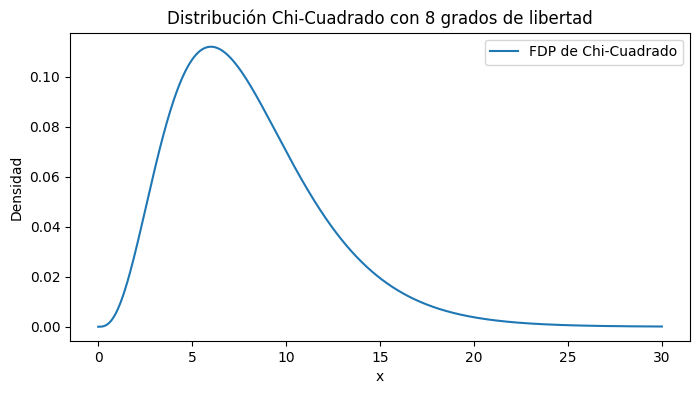

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Definir los grados de libertad
df = 8

# Generar valores x para la FDP
x = np.linspace(0, 30, 1000)

# Calcular la FDP
fdp_values = chi2.pdf(x, df)

# Crear la gráfica de la FDP
plt.figure(figsize=(8, 4))
plt.plot(x, fdp_values, label='FDP de Chi-Cuadrado')
plt.title(f'Distribución Chi-Cuadrado con {df} grados de libertad')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

## Distribución muestral

Nos interesa estudiar la distribución muestral de   

$$\cfrac{(n-1)s^2}{\sigma^2}$$

En especial al área de sus colas:

$\alpha = 0.05$

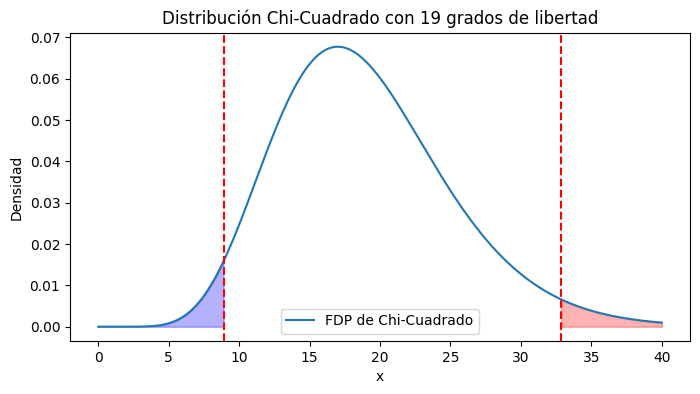

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Definir los grados de libertad
df = 19

# Generar valores x para la FDP
x = np.linspace(0, 40, 1000)

# Calcular la FDP
fdp_values = chi2.pdf(x, df)

# Crear la gráfica de la FDP
plt.figure(figsize=(8, 4))
plt.plot(x, fdp_values, label='FDP de Chi-Cuadrado')
plt.title(f'Distribución Chi-Cuadrado con {df} grados de libertad')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
z_star=chi2.ppf(0.975, df)
plt.axvline(x=z_star, color='red', linestyle='--')
z_star2=chi2.ppf(0.025, df)
plt.axvline(x=z_star2, color='red', linestyle='--')
plt.fill_between(x, fdp_values, where=(x < z_star2), color='blue', alpha=0.3)
plt.fill_between(x, fdp_values, where=(x >= z_star), color='red', alpha=0.3)

plt.show()

In [42]:
z_star=chi2.ppf(0.975, df)
z_star

32.85232686172969

In [43]:
z_star2=chi2.ppf(0.025, df)
z_star2

8.906516481987971

### Intervalo de confianza   

$$\left(\cfrac{(n-1)s^2}{\chi^2_{1-\alpha/2}},\cfrac{(n-1)s^2}{\chi^2_{\alpha/2}}\right)$$

### Pruebas de hipótesis

El estadístico de prueba está dado por

$$\chi^2 = \cfrac{(n-1)s^2}{\sigma^2}$$

## ejemplo

Supongamos que una empresa de alimentos quiere saber si la varianza en el peso de sus productos es mayor a 0.5. Para esto se toma una muestra de 10 productos y se obtienen los siguientes pesos:

|Producto| Peso|
|----------|----------|
|1| 0.5|
|2| 0.6|
|3| 0.7|
|4| 0.8|
|5| 0.9|
|6| 1.0|
|7| 1.1|
|8| 1.2|
|9| 1.3|
|10| 1.4|

### Datos del ejemplo

Número de productos: $n=10$

Varianza poblacional: $\sigma^2 = 0.5$

Grados de libertad : $df=n-1 = 9$

Confianza: $95%$

Significancia $\alpha = 0.05$




In [44]:
peso = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
peso

[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]

Estimador puntual

In [45]:
import numpy as np

peso = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]

s2 = np.var(peso)

print(f"Varianza muestral: {s2}")

Varianza muestral: 0.08249999999999999


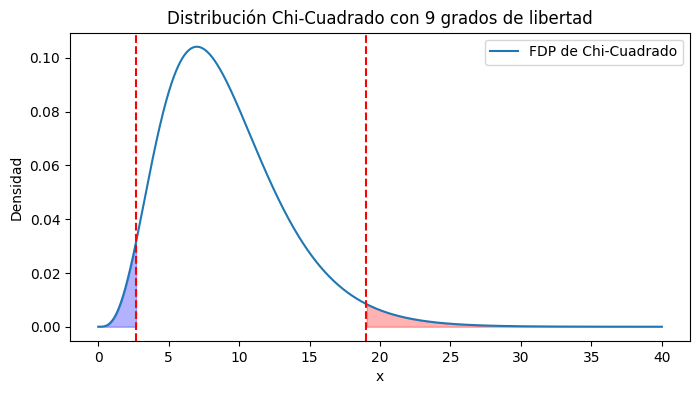

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Definir los grados de libertad
df = 19

# Generar valores x para la FDP
x = np.linspace(0, 40, 1000)
df=10-1
# Calcular la FDP
fdp_values = chi2.pdf(x, df)

# Crear la gráfica de la FDP
plt.figure(figsize=(8, 4))
plt.plot(x, fdp_values, label='FDP de Chi-Cuadrado')
plt.title(f'Distribución Chi-Cuadrado con {df} grados de libertad')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
z_star=chi2.ppf(0.975, df)
plt.axvline(x=z_star, color='red', linestyle='--')
z_star2=chi2.ppf(0.025, df)
plt.axvline(x=z_star2, color='red', linestyle='--')
plt.fill_between(x, fdp_values, where=(x < z_star2), color='blue', alpha=0.3)
plt.fill_between(x, fdp_values, where=(x >= z_star), color='red', alpha=0.3)

plt.show()

In [46]:
df=9
confidence= 0.95
z_star=chi2.ppf((1+confidence)/2, df)
z_star2=chi2.ppf((1-confidence)/2, df)
print(z_star)
print(z_star2)

19.02276779864163
2.7003894999803584


### Intervalo de confianza

In [49]:
ci_lower = df*s2/z_star
ci_upper = df*s2/z_star2

print(f"Intervalo de confianza al 95%: ({ci_lower:.2f}, {ci_upper:.2f})")

Intervalo de confianza al 95%: (0.04, 0.27)


La varizanza poblacional de los pesos está entre 0.04 y 0.28 con un 95% de confianza.

## Prueba de hipótesis

Recordemos que se desea saber si la varianza es mayor a 0.5. Por lo tanto:

$$H_0: \sigma^2 \leq 0.5$$

$$H_1: \sigma^2 > 0.5$$

Como es una prueba a una sola cola entonces:



In [51]:
z_critical=chi2.ppf(0.95, df)
z_critical

16.918977604620448

El valor del estimador es:


$$\chi^2 = \cfrac{(n-1)s^2}{\sigma^2}= \cfrac{(10-1)*0.0825}{0.5}=1.485$$

In [ ]:
(10-1)*0.0825/0.5

1.485

Por lo tanto NO se rechaza la $H_0$ y se puede considerar que hay evidencia estadística para pensar que la varianza en el peso de los productos no es mayor a 0.5.

## Comparación entre varianzas

* En este caso se estudia la razón entre dos varianzas poblacionales. $s_1$ y $s_2$

* Se hace uso de la distribución $F$.

* El estadístico de prueba es:

$$F = \cfrac{s_1^2}{s_2^2}$$

con $n_1-1$ y $n_2-1$ grados de libertad.

## Ejemplo

Dullus County Schools está por renovar el contrato del servicio de autobús para el año entrante y debe decidirse entre dos empresas que prestan el servicio, la empresa Milbank y la empresa Gulf Park. Como medida de la calidad del servicio se emplea la varianza en los tiempos en que llega a recoger/dejar a las personas. Poca varianza indica un mejor servicio, un servicio de mayor calidad. Si las varianzas de las dos empresas son iguales, la escuela elegirá la empresa que ofrezca mejores condiciones financieras. Pero si hay una diferencia significativa en las varianzas, la escuela preferirá la empresa con la menor varianza o mejor servicio.

Para realizar esta prueba de hipótesis se usa como nivel de significancia del 10%.

En una muestra de 26 tiempos de llegada de la empresa Milbank la varianza muestral es 48 y en una muestra de 16 tiempos de llegada de la empresa Gulf Park la varianza muestral es 20.

### Datos del ejemplo

Varianza muestral de Milbank: $s_1^2 = 48$  

Varianza muestral de Gulf Park: $s_2^2 = 20$

Grados de libertad de Milbank: $n_1-1 = 25$

Grados de libertad de Gulf Park: $n_2-1 = 15$

Nivel de significancia: $\alpha = 0.10$

### Planteamiento de las hipótesis

$$H_0: \sigma_1^2 = \sigma_2^2$$

$$H_1: \sigma_1^2 \neq \sigma_2^2$$

### Estadístico de prueba

$$F = \cfrac{s_1^2}{s_2^2} = \cfrac{48}{20} = 2.4$$

### Cálculo del valor crítico





In [52]:
import numpy as np
from scipy.stats import f

# Datos
f1=f.ppf(0.95, 25, 15)
f2=f.ppf(0.05, 25, 15)
print(f"Los valores críticos son, {f1} y {f2}")



Los valores críticos son, 2.2797292800691884 y 0.47872376396813765


Es decir que se rechaza $H_0$ si el estadistico de prueba es meno a 0.47 o mayor a 2.28.

Como tenemos que $F=2.4$ se rechaza la hipótesis nula y por lo tanto las varianza entre las dos empresas si es significativa.


*Importante*

En este caso, se ha observado un valor $F$ mayor que 1, por lo tanto se prueba que la varianza del numerador es mayor que la varianza del denominador, esto implica que se le recomiendo a la escuela que elija la empresa Gulf Park.